# Titanic Analysis

In this exercice, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Let load `matplotlib`, `numpy` and `pandas`

In [1]:
import matplotlib
import numpy as np
import pandas as pd

❓ Load the CSV data as a into a `titanic_df` variable.

the csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [2]:
titanic_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

As a consequence, we want to get rid of the `Cabin` in `titanic_df` using the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function.

In [13]:
titanic_df.drop('Cabin',axis = 1,inplace = True)

In [14]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [1]:
"Name" in titanic_df.columns

NameError: name 'titanic_df' is not defined

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [16]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [18]:
titanic_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,214
2,184,184,184,184,173,184,184,184,184,184
3,491,491,491,491,355,491,491,491,491,491


In [21]:
pclass_df = titanic_df.groupby("Pclass").count()['PassengerId']

In [22]:
pclass_df

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [24]:
pclass_df = pclass_df.to_frame(name = 'count')
pclass_df 

,count
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<AxesSubplot:xlabel='Pclass'>

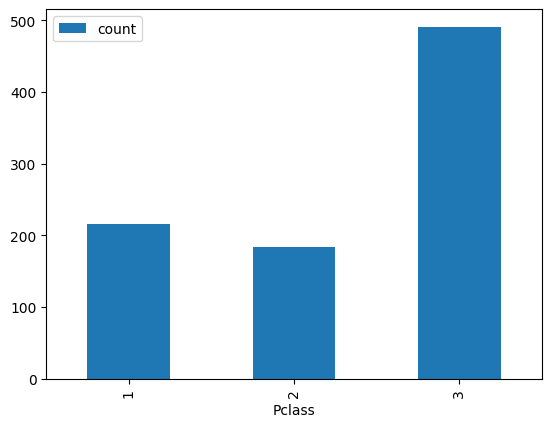

In [25]:
# YOUR CODE HERE
pclass_df.plot(kind= 'bar')

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

<AxesSubplot:xlabel='Pclass'>

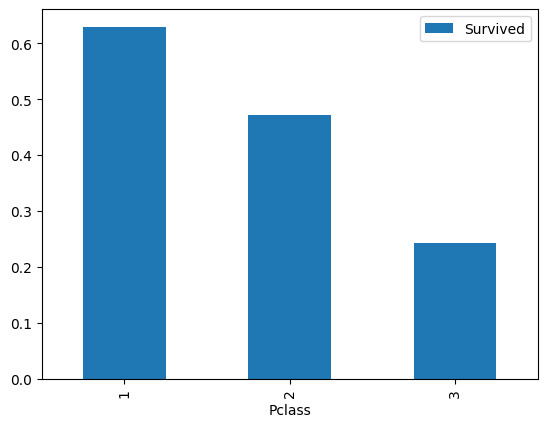

In [30]:
titanic_df[['Pclass','Survived']].groupby('Pclass').mean().plot(kind='bar')

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [31]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

<AxesSubplot:xlabel='Sex'>

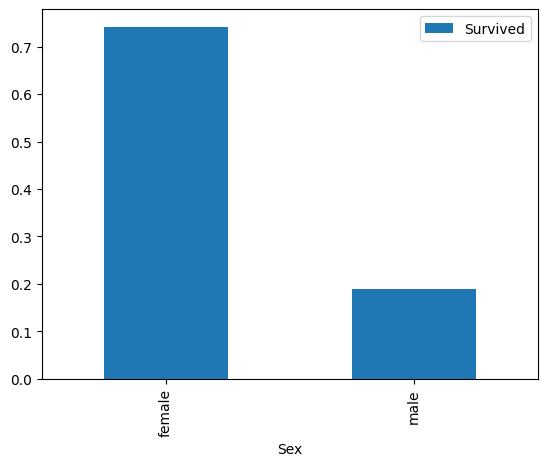

In [33]:
titanic_df[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar')

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [41]:
titanic_df[['Sex','Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [36]:
survivors_df = titanic_df[['Sex','Survived']].groupby('Sex').sum()
survivors_df

,Survived
Sex,
female,233
male,109


In [38]:
survivors_df['Total'] = titanic_df[['Sex','Survived']].groupby('Sex').count()

In [61]:
[children_df['Survived'].sum(),children_df.shape[0]]

[61, 113]

In [62]:
survivors_df.loc['children'] = [children_df['Survived'].sum(),children_df.shape[0]]

In [63]:
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


<AxesSubplot:xlabel='Sex'>

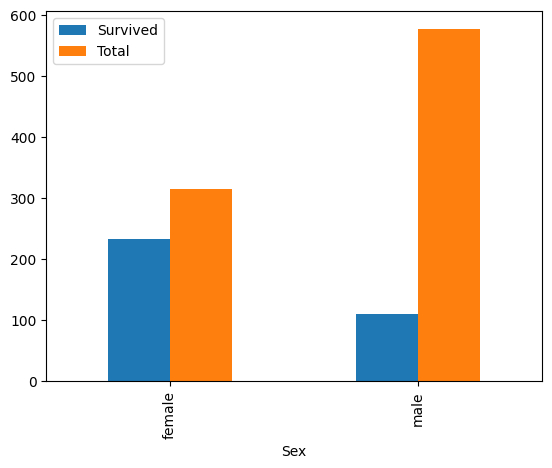

In [40]:
survivors_df.plot(kind = 'bar')

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [42]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [43]:
titanic_df['Age'] <= 17

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [44]:
condition = titanic_df['Age'] <= 17
children_df = titanic_df[condition]
children_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S


❓ How many children were there in the Titanic?

In [46]:
children_df.shape

(113, 11)

In [47]:
children_df.shape[0]

113

❓ How many children survived?

In [48]:
children_df['Survived'].sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [50]:
children_df[['Survived','Sex']].head()

,Survived,Sex
7,0,male
9,1,female
10,1,female
14,0,female
16,0,male


In [52]:
children_df[['Survived','Sex']].groupby('Sex').sum()

,Survived
Sex,
female,38
male,23


In [54]:
children_df[['Survived','Sex']].groupby('Sex').count()

,Survived
Sex,
female,55
male,58


In [65]:
children_gender_df = children_df[['Survived','Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived','Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [0,0]
children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


In [64]:
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


<AxesSubplot:xlabel='Sex'>

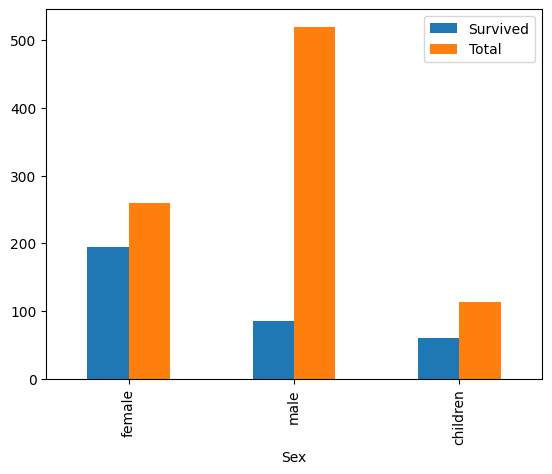

In [66]:
(survivors_df - children_gender_df).plot(kind = 'bar')

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [67]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [68]:
titanic_df['SibSp']+titanic_df['Parch']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [69]:
titanic_df['family_size'] = titanic_df['SibSp']+titanic_df['Parch']

In [70]:
titanic_df['family_size'].head()

0    1
1    1
2    0
3    1
4    0
Name: family_size, dtype: int64

In [72]:
titanic_df.groupby('family_size').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
family_size,,,,,,,
0,458.000000,0.303538,2.400372,32.220297,0.000000,0.000000,21.242689
1,412.838509,0.552795,1.919255,31.391511,0.763975,0.236025,49.894129
2,448.352941,0.578431,2.225490,26.035806,0.872549,1.127451,39.692482
3,514.344828,0.724138,2.068966,18.274815,1.344828,1.655172,54.864510
4,367.866667,0.200000,2.666667,20.818182,2.133333,1.866667,58.094453
5,400.136364,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727
6,355.750000,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667
7,393.833333,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000
10,481.714286,0.000000,3.000000,NaN,8.000000,2.000000,69.550000


<AxesSubplot:xlabel='family_size'>

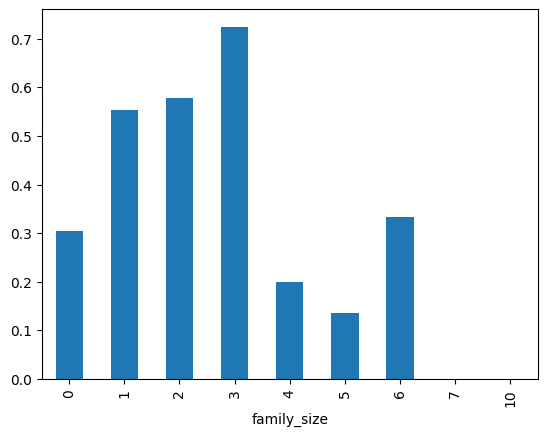

In [74]:
titanic_df.groupby('family_size').mean()['Survived'].plot(kind = 'bar')

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [78]:
titanic_df['Name'].head(2)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object

In [77]:
titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).head(2)

0     Mr
1    Mrs
Name: Name, dtype: object

In [81]:
titanic_df['Name'].apply(lambda x: x.split(',')[1])

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: Name, Length: 891, dtype: object

In [85]:
titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [88]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [90]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [96]:
titanic_df.groupby('Title').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
Title,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,2,2
Don,1,1,1,1,1,1,1,1,1,1,1,1
Dr,7,7,7,7,7,6,7,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,36,40,40,40,40,40,40
Miss,182,182,182,182,182,146,182,182,182,182,181,182


<AxesSubplot:xlabel='Title'>

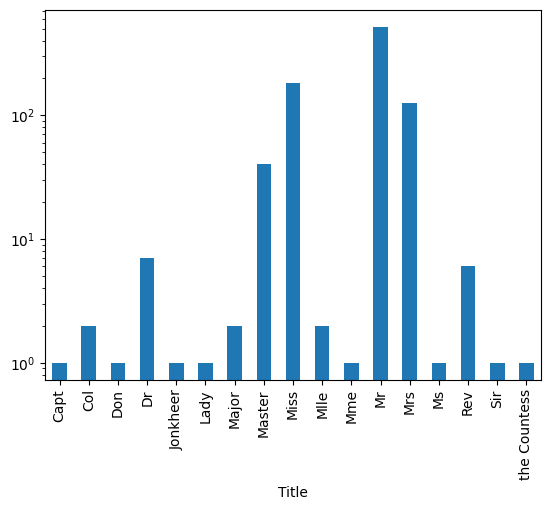

In [99]:
titanic_df.groupby('Title').count()['PassengerId'].plot(kind = 'bar',logy = True)

<AxesSubplot:xlabel='Title'>

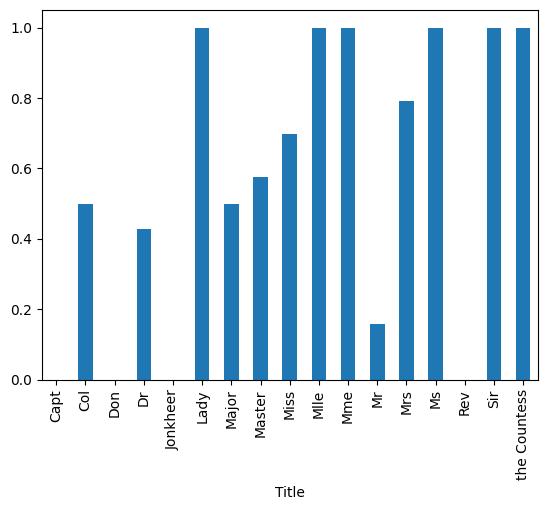

In [100]:
titanic_df.groupby('Title').mean()['Survived'].plot(kind = 'bar')